
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# EDA på iris dataset
iris = load_iris()

print(iris.DESCR) # Beskrivelse av datasettet

print(iris.feature_names) # Namn på features 
print(iris.target_names) # Namn på target

print(iris.keys()) # keys i datasettet
print(iris.data.shape) # Shape på datasettet

print(iris.data[:5]) # De första 5 raderna i datasettet
print(iris.target[:5]) # De första 5 raderna i target


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [34]:
# Skapar dataframe med pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target 

df.dropna()

print(df.describe()) # Beskrivelse av datasettet
print(df.isnull().sum()) # Kollar om det finns några null värden
print(df.value_counts()) # Kollar antal av varje species

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
pet

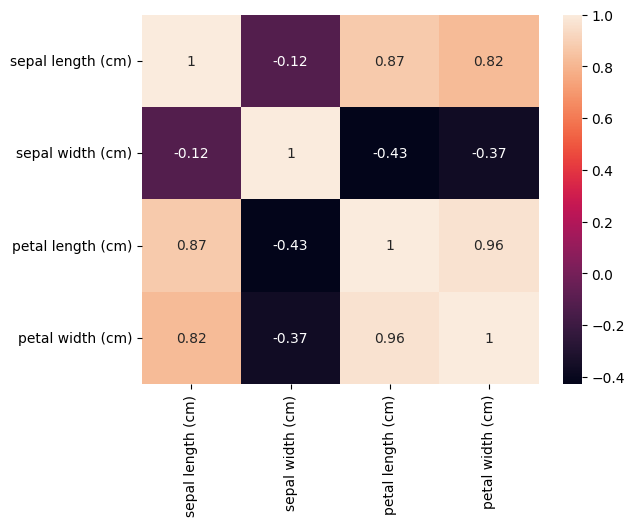

In [35]:
corr_matrix = df.iloc[:, :-1].corr() # Exkluderar sista kolumnen(species) för att .corr bara fungerar på numeriska värden.

sns.heatmap(corr_matrix, annot=True)
plt.show()

# 1.00 → Perfekt korrelation (diagonal values)
# Nära 1 → Stark positiv korrelation (exempel petal length & petal width)
# Nära -1 → Stark negativ korrelation
# Nära 0 → ingen korrelation


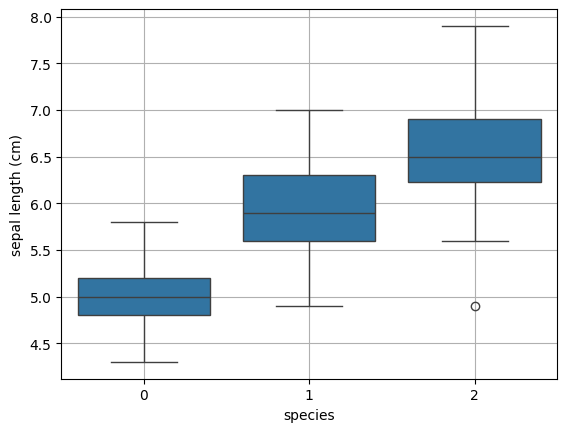

In [36]:
sns.boxplot(data=df, x="species", y="sepal length (cm)")
plt.grid()
plt.show()

In [37]:
# removing outliers
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

df.shape, df_cleaned.shape

((150, 5), (146, 5))

## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_cleaned.drop("species", axis=1) # Features bara numeriska
y = df_cleaned["species"] # Target bara numerisk

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42) # train test split

model = StandardScaler() # Skapar en instans av StandardScaler
X_train_scaled = model.fit_transform(X_train) # Fit och transform på X_train
X_test_scaled = model.transform(X_test) 


X_train_mean = np.mean(X_train_scaled, axis=0) # Medelvärde på X_train
X_train_std = np.std(X_train_scaled, axis=0) # Standardavvikelse på X_train

X_test_mean = np.mean(X_test_scaled, axis=0) # Medelvärde på X_test
X_test_std = np.std(X_test_scaled, axis=0) # Standardavvikelse på X_test


for feature, mean in zip(iris.feature_names, X_train_mean): # Loopar igenom och printar ut medelvärde och standardavvikelse för varje feature, zip för att loopa igenom två listor samtidigt
    print(f"Mean on X_train {feature}: {mean:.2f}")

for feature, std in zip(iris.feature_names, X_train_std):
    print(f"Standard deviation on X_train {feature}: {std:.2f}")

for feature, mean in zip(iris.feature_names, X_test_mean):
    print(f"Mean on X_test {feature}: {mean:.2f}")

for feature, std in zip(iris.feature_names, X_test_std):
    print(f"Standard deviation on X_test {feature}: {std:.2f}")


Mean on X_train sepal length (cm): 0.00
Mean on X_train sepal width (cm): 0.00
Mean on X_train petal length (cm): -0.00
Mean on X_train petal width (cm): -0.00
Standard deviation on X_train sepal length (cm): 1.00
Standard deviation on X_train sepal width (cm): 1.00
Standard deviation on X_train petal length (cm): 1.00
Standard deviation on X_train petal width (cm): 1.00
Mean on X_test sepal length (cm): -0.06
Mean on X_test sepal width (cm): 0.12
Mean on X_test petal length (cm): -0.12
Mean on X_test petal width (cm): -0.04
Standard deviation on X_test sepal length (cm): 0.87
Standard deviation on X_test sepal width (cm): 0.87
Standard deviation on X_test petal length (cm): 1.07
Standard deviation on X_test petal width (cm): 1.14


## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42) # Skapar en instans av KFold, shuffle = True för att blanda datan

model = LogisticRegression() # Skapar en instans av LogisticRegression

scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring="accuracy") # Cross val score

for fold, score in enumerate(scores, 1): # Loopar igenom och printar ut score för varje fold, startar på 1, enumerate för att få index
    print(f"Score on {fold}: {score}")


print(f"Mean: {scores.mean()}") # Medelvärde på scores






Score on 1: 0.9
Score on 2: 0.8
Score on 3: 1.0
Score on 4: 1.0
Score on 5: 1.0
Score on 6: 1.0
Score on 7: 0.9
Score on 8: 1.0
Score on 9: 1.0
Score on 10: 1.0
Mean: 0.96


## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

True: 0, Prediction: 0
True: 2, Prediction: 2
True: 0, Prediction: 0
True: 0, Prediction: 0
True: 0, Prediction: 0
True: 2, Prediction: 2
True: 0, Prediction: 0
True: 1, Prediction: 1
True: 1, Prediction: 2
True: 0, Prediction: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        11
           2       0.95      1.00      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



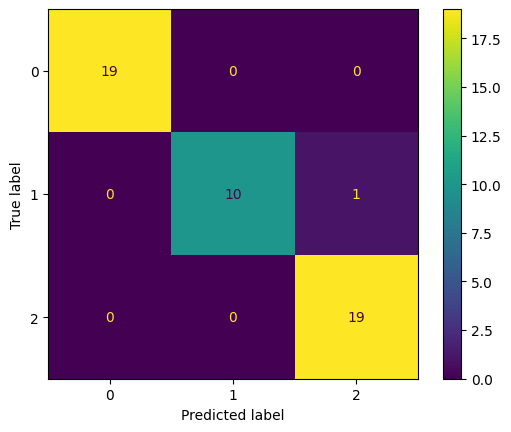

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
model.fit(X_train_scaled, y_train) # Fit på X_train
y_pred = model.predict(X_test_scaled) # Predict på X_test

for true, prediction in zip(y_test[:10], y_pred[:10]):
    print(f"True: {true}, Prediction: {prediction}")


cn = confusion_matrix(y_test, y_pred) # Confusion matrix
ConfusionMatrixDisplay(cn).plot()

print(classification_report(y_test, y_pred)) # Classification report

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---